In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm

Data Collection and Processing

In [4]:
loan_dataset = pd.read_csv('dataset.csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan_dataset.shape

(614, 13)

Statistical Process

In [8]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
print(loan_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [10]:
loan_dataset.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_dataset = loan_dataset.dropna()

In [12]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

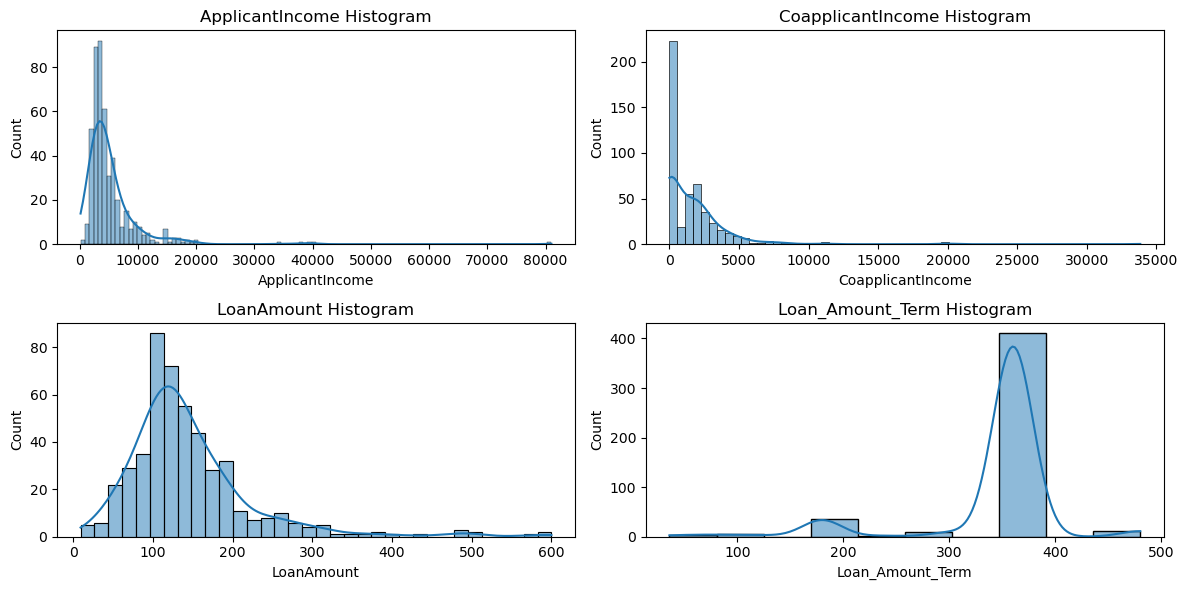

In [13]:
# Kategorik değişkenlerin frekansları
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal değişkenlerin histogramları
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(loan_dataset['ApplicantIncome'], kde=True)
plt.title('ApplicantIncome Histogram')

plt.subplot(2, 2, 2)
sns.histplot(loan_dataset['CoapplicantIncome'], kde=True)
plt.title('CoapplicantIncome Histogram')

plt.subplot(2, 2, 3)
sns.histplot(loan_dataset['LoanAmount'].dropna(), kde=True)
plt.title('LoanAmount Histogram')

plt.subplot(2, 2, 4)
sns.histplot(loan_dataset['Loan_Amount_Term'].dropna(), kde=True)
plt.title('Loan_Amount_Term Histogram')

plt.tight_layout()
plt.show()


C:\Users\yigit_5rkz30x\AppData\Local\Temp\ipykernel_10856\3210365175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan_dataset.corr()


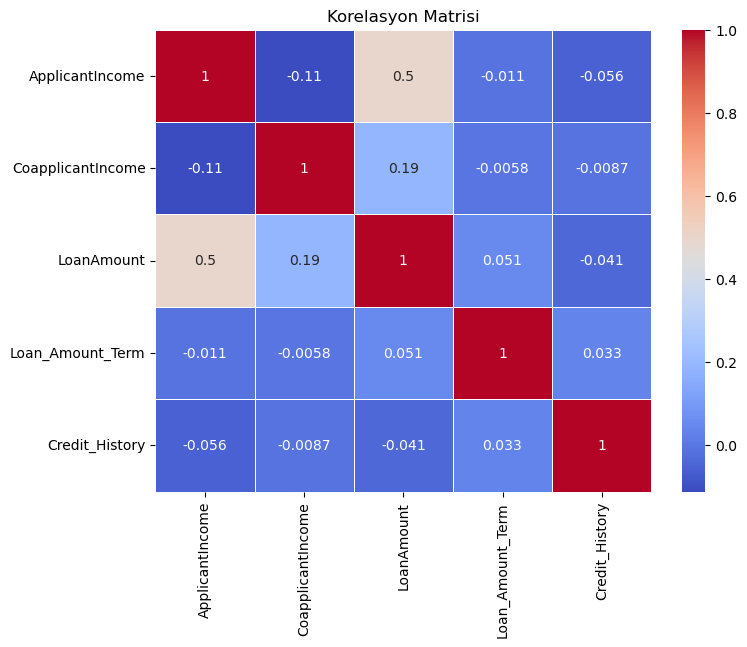

In [14]:
# Korelasyon matrisini görselleştir
corr_matrix = loan_dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Korelasyon Matrisi')
plt.show()


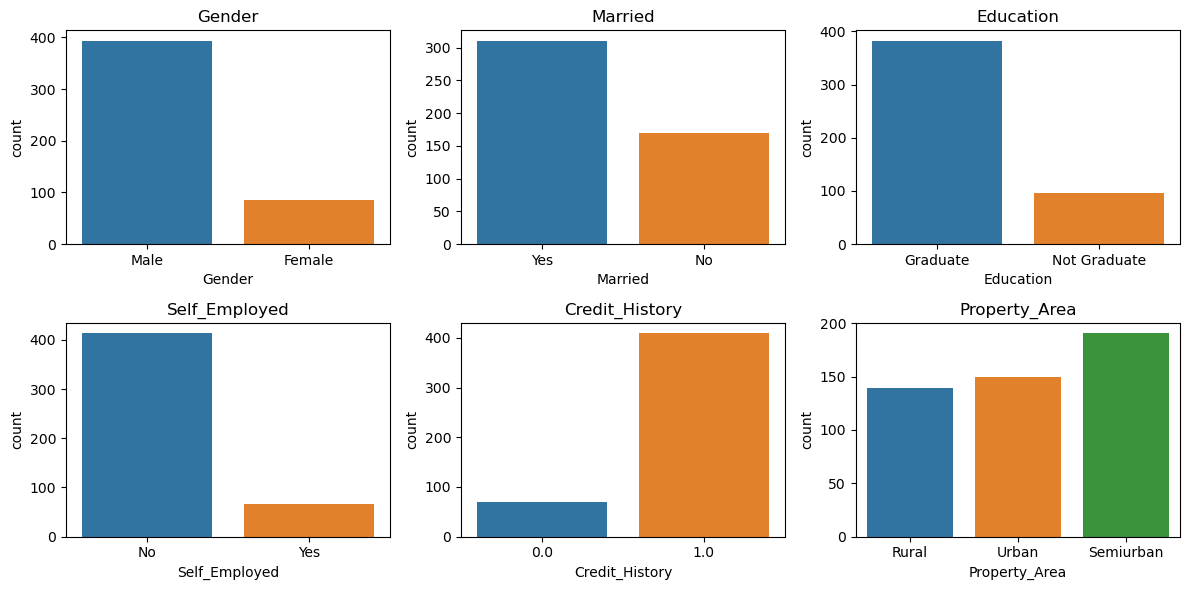

In [15]:
# Kategorik değişkenlerin frekansları
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.countplot(data=loan_dataset, x='Gender')
plt.title('Gender')

plt.subplot(2, 3, 2)
sns.countplot(data=loan_dataset, x='Married')
plt.title('Married')

plt.subplot(2, 3, 3)
sns.countplot(data=loan_dataset, x='Education')
plt.title('Education')

plt.subplot(2, 3, 4)
sns.countplot(data=loan_dataset, x='Self_Employed')
plt.title('Self_Employed')

plt.subplot(2, 3, 5)
sns.countplot(data=loan_dataset, x='Credit_History')
plt.title('Credit_History')

plt.subplot(2, 3, 6)
sns.countplot(data=loan_dataset, x='Property_Area')
plt.title('Property_Area')

plt.tight_layout()
plt.show()


In [16]:
loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True) 

In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [18]:
#Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

#replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [19]:
#dependent values 
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

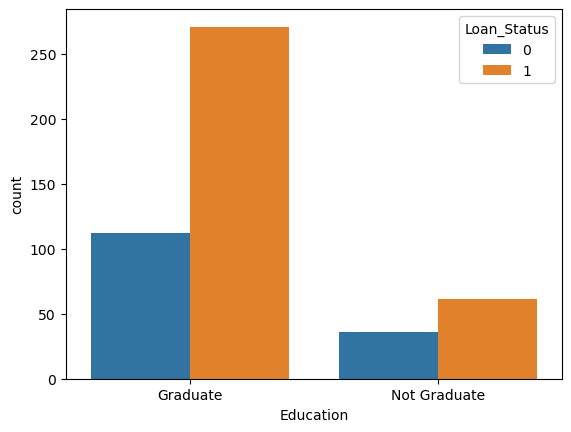

In [20]:
#education & loan_status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

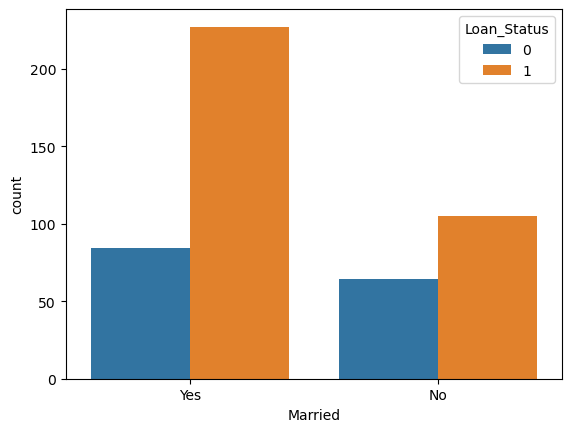

In [21]:
# marital status & Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

In [22]:
#convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1}, 'Gender':{'Male':1,'Female':0}, 
                     'Self_Employed':{'No':0,'Yes':1},
                     'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2 },
                     'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [23]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [24]:
# separating the data and label 
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_dataset['Loan_Status']

In [25]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3+,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [26]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [28]:
X.shape, X_train.shape, X_test.shape

((480, 11), (432, 11), (48, 11))

Training the model:
Support Vector Machine Model 

In [29]:
classifier = svm.SVC(kernel='linear')

In [30]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace('3+', 4)


In [31]:
loan_dataset.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1}, 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)


In [32]:
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)


In [47]:
X_train_prediction = classifier.predict(X_train)
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction, y_train)

In [48]:
print('Accuracy on training data :',training_data_accuray)

Accuracy on training data : 0.7986111111111112


In [49]:
X_test_prediction = classifier.predict(X_test)
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction, y_test)

In [50]:
print('Accuracy on test data :',test_data_accuray)

Accuracy on test data : 0.8333333333333334


Making a prediction system

In [60]:
input_data = np.array([0, 1, 2, 1, 0, 5000, 2000, 150, 360, 1, 1]).reshape(1, -1)

# Making a prediction
prediction = classifier.predict(input_data)

if prediction[0] == 1:
    print('Loan Status: Yes')
else:
    print('Loan Status: No')


Loan Status: Yes


C:\Users\yigit_5rkz30x\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
